In [ ]:
!which python
!conda list | grep tables
!conda list | grep tbb

/opt/anaconda3/envs/scenicplus/bin/python
immutables                0.20                     pypi_0    pypi
pytables                  3.10.2          py311hd0690c4_2    conda-forge
tables                    3.9.2                    pypi_0    pypi
tbb                       2022.1.0             h9541205_0    conda-forge


In [ ]:
#!pip install scanpy

#!pip install igraph
#!pip install leidenalg
#!pip install louvain




In [ ]:
#!pip install git+https://github.com/colomemaria/epiScanpy

In [ ]:
!pip show episcanpy

Name: episcanpy
Version: 0.4.0+40.g9606066.dirty
Summary: Epigenomics Single-Cell Analysis in Python.
Home-page: http://github.com/colomemaria/epiScanpy
Author: 
Author-email: 
License: BSD
Location: /opt/anaconda3/envs/scenicplus/lib/python3.11/site-packages
Requires: anndata, bamnostic, biopython, h5py, intervaltree, joblib, kneed, legacy-api-wrap, matplotlib, natsort, networkx, numba, numpy, packaging, pandas, pyjaspar, pysam, scanpy, scikit-learn, scipy, seaborn, setuptools_scm, statsmodels, tqdm, umap-learn
Required-by: 


In [ ]:
import numpy as np
import scanpy as sc
import anndata as ad

import pandas as pd

import episcanpy.api as epi

1.1 Getting the three files

In [ ]:
barcodes = pd.read_csv('GSE126074_AdBrainCortex_SNAREseq_chromatin.barcodes.tsv', sep='\t', header=None)
counts = epi.read_mtx('GSE126074_AdBrainCortex_SNAREseq_chromatin.counts.mtx')
peaks = pd.read_csv('GSE126074_AdBrainCortex_SNAREseq_chromatin.peaks.tsv', sep='\t', header=None)

In [ ]:
barcodes

,0
0,09A_GATGCGCGGCTA
1,09A_GCCATGACCCCA
2,09F_TGGACGATTTGT
3,09K_GTCTGCCATTAC
4,09F_GGATGAAGAGGG
...,...
10304,09F_AACCTCACTGAC
10305,09B_CACGTTAGCGCG
10306,09L_ATGTCAGATATA
10307,09L_AGTGGCCTCCTT


In [ ]:
counts

AnnData object with n_obs × n_vars = 244544 × 10309

In [ ]:
peaks

,0
0,chr1:3005833-3005982
1,chr1:3094772-3095489
2,chr1:3119556-3120739
3,chr1:3121334-3121696
4,chr1:3134637-3135032
...,...
244539,chrY:90732105-90732474
244540,chrY:90740917-90741416
244541,chrY:90741519-90742734
244542,chrY:90742824-90743114


In [ ]:
counts_T = counts.T

In [ ]:
counts_T.obs_names = barcodes.iloc[:, 0].values
counts_T.var_names = peaks.iloc[:, 0].values

In [ ]:
counts_T

AnnData object with n_obs × n_vars = 10309 × 244544

In [ ]:
counts_T.obs

""
09A_GATGCGCGGCTA
09A_GCCATGACCCCA
09F_TGGACGATTTGT
09K_GTCTGCCATTAC
09F_GGATGAAGAGGG
...
09F_AACCTCACTGAC
09B_CACGTTAGCGCG
09L_ATGTCAGATATA
09L_AGTGGCCTCCTT


In [ ]:
counts_T.obs['cell_id'] = counts_T.obs_names
counts_T.var['feature_id'] = counts_T.var_names

In [ ]:
counts_T

AnnData object with n_obs × n_vars = 10309 × 244544
    obs: 'cell_id'
    var: 'feature_id'

1.2 Episcanpy Analysis

In [ ]:
epi.pp.filter_cells(counts_T, min_features=200)
epi.pp.filter_features(counts_T, min_cells=50)


In [ ]:
sc.pp.neighbors(counts_T)
sc.tl.umap(counts_T)
sc.tl.leiden(counts_T)
sc.tl.louvain(counts_T)

         Falling back to preprocessing with `sc.pp.pca` and default params.


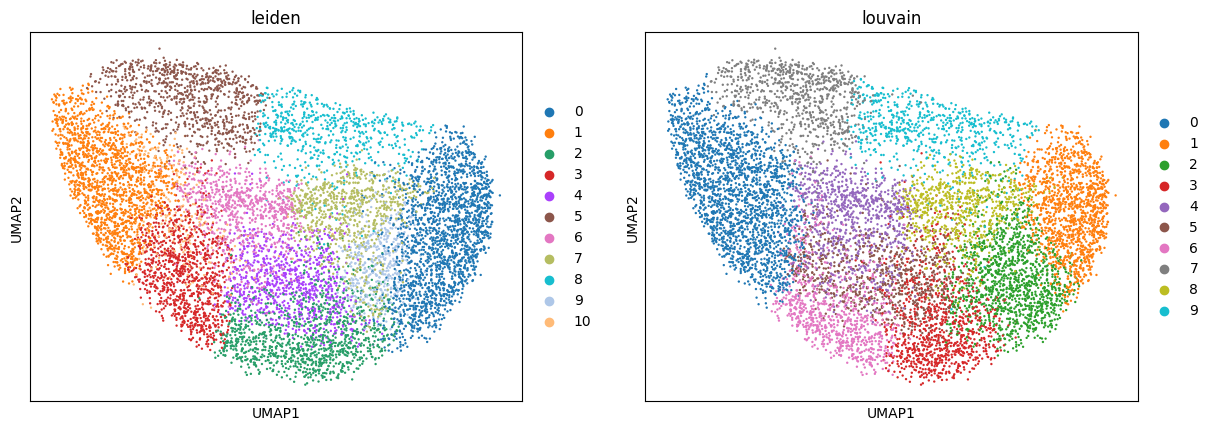

In [ ]:
epi.pl.umap(counts_T, color=['leiden', 'louvain'])

In [ ]:
epi.tl.kmeans(counts_T, num_clusters=10)

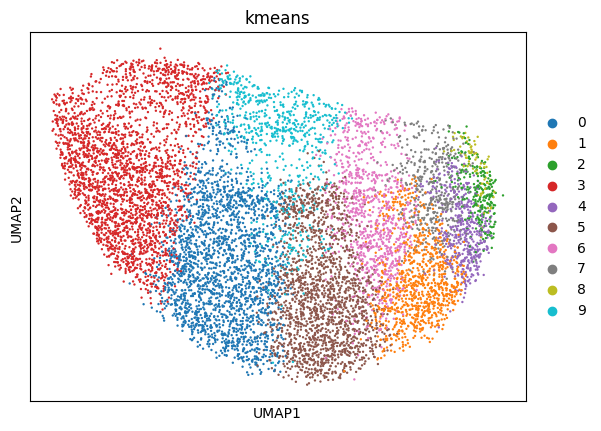

In [ ]:
epi.pl.umap(counts_T, color='kmeans')

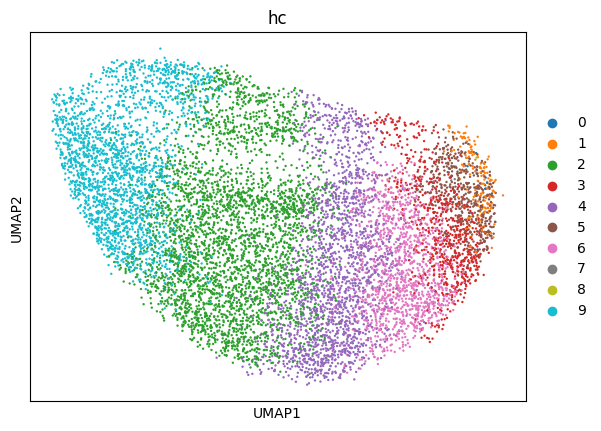

In [ ]:
epi.tl.hc(counts_T, num_clusters=10)
epi.pl.umap(counts_T, color='hc')

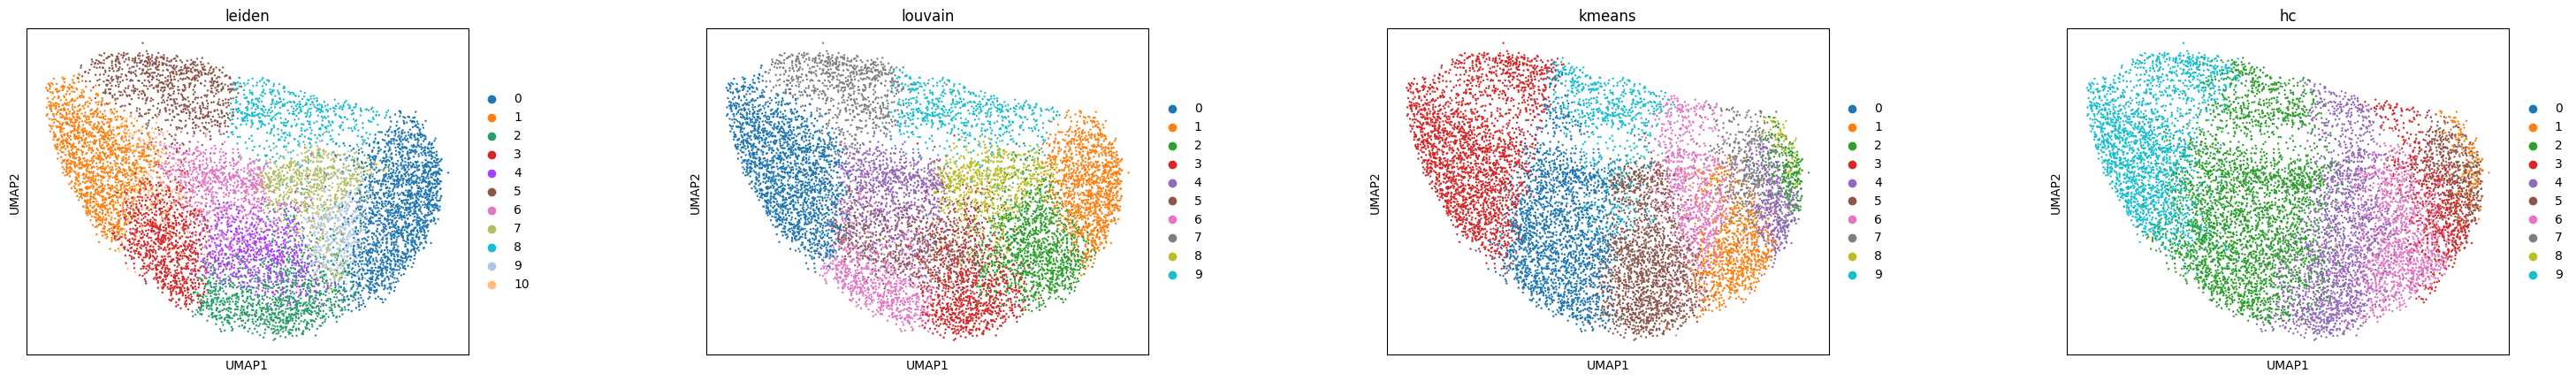

In [ ]:
# Comparison of all clusterings
epi.pl.umap(counts_T, color=['leiden', 'louvain', 'kmeans', 'hc'], wspace=.4)

In [ ]:
counts_T.shape

(10309, 99862)

1.3 Cistopic Analysis and Comparison

In [ ]:
from pycisTopic.cistopic_class import create_cistopic_object
import scipy.sparse as sp

counts_T_matrix = sp.csr_matrix(counts_T.X.T.astype(int))

counts_T_cistopic = create_cistopic_object(fragment_matrix=counts_T_matrix,
                                           cell_names=counts_T.obs_names.tolist(),
                                           region_names=counts_T.var_names.tolist())
counts_T_cistopic

2025-04-14 15:41:22,942 cisTopic     INFO     Creating CistopicObject
2025-04-14 15:41:23,312 cisTopic     INFO     Done!


In [ ]:
from pycisTopic.lda_models import run_cgs_models
from pycisTopic.clust_vis import find_clusters, run_umap, run_tsne, plot_metadata, plot_topic, cell_topic_heatmap
import matplotlib.pyplot as plt

models = run_cgs_models(
    counts_T_cistopic,
    n_topics=[10, 20, 30],
    n_cpu=8,
    random_state=114514,
    ignore_reinit_error=True
)

2025-04-14 15:44:57,172	INFO worker.py:1724 -- Started a local Ray instance.


(run_cgs_model pid=14738) 2025-04-14 15:44:59,413 cisTopic     INFO     Running model with 10 topics
(run_cgs_model pid=14738) 2025-04-14 15:51:07,065 cisTopic     INFO     Model with 10 topics done!
(run_cgs_model pid=14739) 2025-04-14 15:44:59,413 cisTopic     INFO     Running model with 30 topics [repeated 2x across cluster]
(run_cgs_model pid=14737) 2025-04-14 15:54:39,269 cisTopic     INFO     Model with 20 topics done!
(run_cgs_model pid=14739) 2025-04-14 15:58:59,033 cisTopic     INFO     Model with 30 topics done!


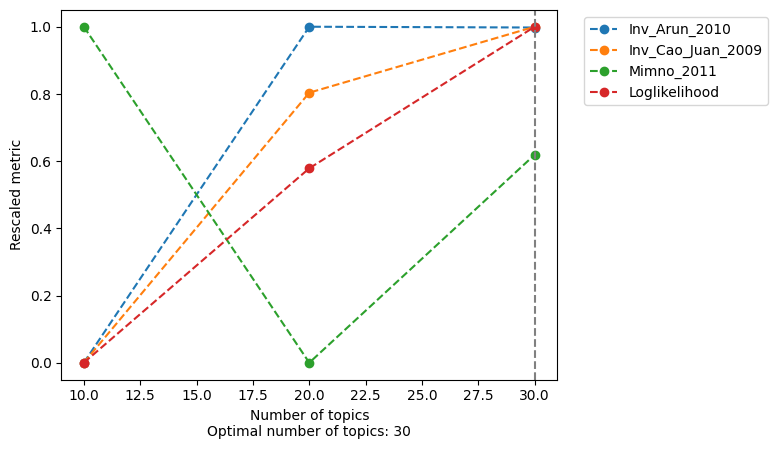

In [ ]:
from pycisTopic.lda_models import evaluate_models

evaluate_models(models)

In [ ]:
selected_model = models[-1]
counts_T_cistopic.add_LDA_model(selected_model)
counts_T_cistopic.selected_model = selected_model

In [ ]:
find_clusters(
    counts_T_cistopic,
    k=10,
    res=[0.75],
    prefix='pycisTopic_',
    scale=True,
    split_pattern='-'
)

run_umap(counts_T_cistopic)

2025-04-14 15:59:00,141 cisTopic     INFO     Finding neighbours
2025-04-14 15:59:27,551 cisTopic     INFO     Running UMAP


In [ ]:
counts_T_cistopic.cell_data.columns

Index(['cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc',
       'cisTopic_log_nr_acc', 'sample_id', 'pycisTopic_leiden_10_0.75'],
      dtype='object')

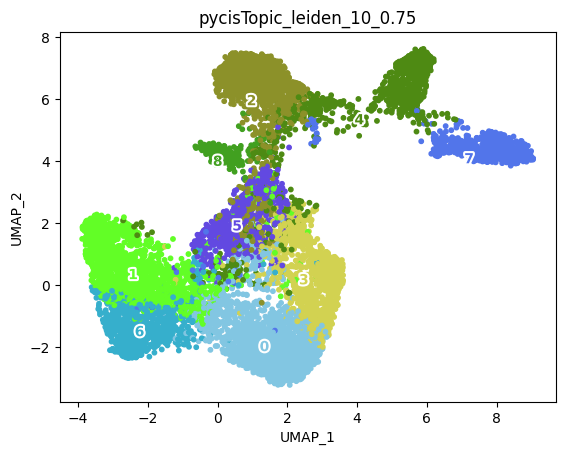

In [ ]:
plot_metadata(
    counts_T_cistopic,
    reduction_name='UMAP',
    variables=['pycisTopic_leiden_10_0.75']
)

2025-04-14 15:59:30,716 cisTopic     INFO     Running TSNE


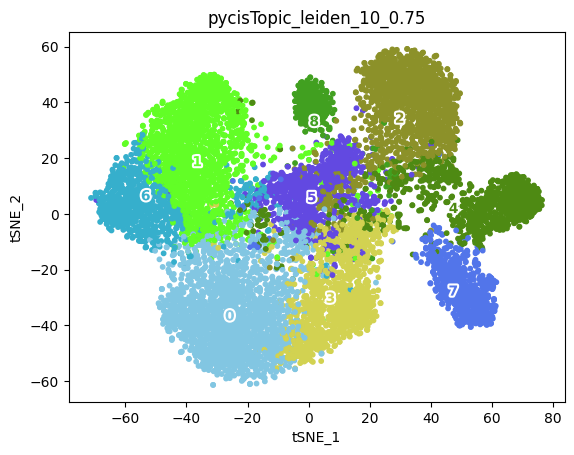

In [ ]:
run_tsne(counts_T_cistopic, target='cell', reduction_name='TSNE', random_state=114514, perplexity=30)
plot_metadata(
    counts_T_cistopic,
    reduction_name='TSNE',
    variables=['pycisTopic_leiden_10_0.75']
)

Here, by pycisTopic, we can find that the clustering is much better than that by epiScanpy. Mainly, the data points are more concentrated after dimension reduction.

2.1

In [ ]:
import os, tarfile

Q2_tar = 'brca_tcga_pub2015.tar'

if os.path.exists(Q2_tar) and tarfile.is_tarfile(Q2_tar):
    with tarfile.open(Q2_tar) as tar:
        tar.extractall()
        print(f'{Q2_tar} extracted!')

    os.remove(Q2_tar)
else:
    print('File already extracted')

File already extracted


In [ ]:
# Data extraction
data_mutations_path = 'brca_tcga_pub2015/case_lists/data_mutations.txt'
clinical_patient_path = 'brca_tcga_pub2015/data_clinical_patient.txt'

patients_df = pd.read_csv(clinical_patient_path, sep='\t', skiprows=4)
patients_df

,PATIENT_ID,OTHER_PATIENT_ID,FORM_COMPLETION_DATE,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,DAYS_TO_BIRTH,SEX,MENOPAUSE_STATUS,RACE,ETHNICITY,...,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,HISTOLOGICAL_DIAGNOSIS,ICD_10,ICD_O_3_HISTOLOGY,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,TCGA-LQ-A4E4,4F321D41-3255-46A4-AE0D-1CF39699E624,12/5/12,NO,YES,-26883,Female,Post (prior bilateral ovariectomy OR >12 mo si...,WHITE,NOT HISPANIC OR LATINO,...,0,Infiltrating Lobular Carcinoma,C50.9,8520/3,C50.9,YES,0:LIVING,27.89,1:Recurred/Progressed,22.37
1,TCGA-A2-A3KC,2D29A4AC-98E7-4663-9DD6-5681BC32AC2E,3/14/12,YES,NO,-20401,Female,Pre (<6 months since LMP AND no prior bilatera...,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,...,0,Infiltrating Lobular Carcinoma,C50.9,8520/3,C50.9,YES,0:LIVING,36.2,0:DiseaseFree,36.2
2,TCGA-A2-A3KD,BB026999-0AAB-4232-96D7-2C93B6C9691D,4/2/12,YES,NO,-17372,Female,Pre (<6 months since LMP AND no prior bilatera...,WHITE,NOT HISPANIC OR LATINO,...,0,Mucinous Carcinoma,C50.9,8480/3,C50.9,YES,0:LIVING,39.62,0:DiseaseFree,39.62
3,TCGA-A7-A0D9,17baef7c-d97d-4b98-ab53-503ef856523d,10/4/10,YES,NO,-13836,Female,Pre (<6 months since LMP AND no prior bilatera...,WHITE,NOT HISPANIC OR LATINO,...,0,Infiltrating Ductal Carcinoma,C50.9,8500/3,C50.9,YES,0:LIVING,37.42,0:DiseaseFree,37.42
4,TCGA-A7-A0DA,3afa1e93-1df8-4e4c-aaa4-557463f4bb77,1/10/11,YES,NO,-22708,Female,Post (prior bilateral ovariectomy OR >12 mo si...,WHITE,NOT HISPANIC OR LATINO,...,0,Infiltrating Ductal Carcinoma,C50.9,8500/3,C50.9,YES,0:LIVING,35.64,0:DiseaseFree,35.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,TCGA-BH-A0BG,4f608829-ffc4-4527-886e-6bc764ab29f5,8/8/11,NO,YES,-26988,Female,Post (prior bilateral ovariectomy OR >12 mo si...,WHITE,NOT HISPANIC OR LATINO,...,0,Infiltrating Ductal Carcinoma,C50.9,8500/3,C50.9,YES,0:LIVING,61.47,0:DiseaseFree,61.47
813,TCGA-BH-A0BF,e6b79d7a-ed6b-459a-b040-d142616e7ab4,8/5/11,NO,YES,-20691,Female,Post (prior bilateral ovariectomy OR >12 mo si...,WHITE,NOT HISPANIC OR LATINO,...,0,Infiltrating Ductal Carcinoma,C50.9,8500/3,C50.9,YES,1:DECEASED,43.5,[Not Available],[Not Available]
814,TCGA-BH-A209,5258294f-ef5b-4091-9183-6bcc545d54b2,9/8/11,NO,YES,-28403,Female,Post (prior bilateral ovariectomy OR >12 mo si...,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,...,0,Medullary Carcinoma,C50.9,8510/3,C50.9,YES,1:DECEASED,130.06,[Not Available],[Not Available]
815,TCGA-BH-A208,ddcbdac6-9e43-4146-a611-d033125eba14,9/8/11,NO,YES,-17715,Female,[Not Available],WHITE,NOT HISPANIC OR LATINO,...,0,Infiltrating Ductal Carcinoma,C50.9,8500/3,C50.9,YES,1:DECEASED,57.79,[Not Available],[Not Available]


In [ ]:
mutations_df = pd.read_csv(data_mutations_path, sep='\t')
mutations_df

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,DOMAINS,MOTIF_SCORE_CHANGE,PolyPhen,ENSP,Amino_acids,CCDS,EA_MAF,Allele,cDNA_position,PUBMED
0,PTGER3,5733,genome.wustl.edu;unc.edu,GRCh37,1,71512366,71512366,+,"missense_variant,splice_region_variant",Missense_Mutation,...,"Transmembrane_helices:Tmhmm,Pfam_domain:PF0000...",NaN,probably_damaging(0.997),ENSP00000349003,L/V,CCDS655.1,NaN,C,1106/1943,NaN
1,FLG,2312,genome.wustl.edu;unc.edu,GRCh37,1,152285981,152285981,+,missense_variant,Missense_Mutation,...,"Low_complexity_(Seg):Seg,PROSITE_profiles:PS50324",NaN,probably_damaging(0.988),ENSP00000357789,R/W,CCDS30860.1,NaN,A,1417/12747,NaN
2,GPR52,9293,genome.wustl.edu,GRCh37,1,174417411,174417411,+,synonymous_variant,Silent,...,"Transmembrane_helices:Tmhmm,Prints_domain:PR00...",NaN,NaN,ENSP00000356658,I,CCDS30941.1,NaN,A,200/1472,NaN
3,SLC35F3,148641,genome.wustl.edu;unc.edu,GRCh37,1,234452419,234452419,+,synonymous_variant,Silent,...,Pfam_domain:PF06027,NaN,NaN,ENSP00000355577,S,CCDS1600.1,NaN,T,1045/2891,NaN
4,OR2T3,343173,genome.wustl.edu,GRCh37,1,248636826,248636826,+,missense_variant,Missense_Mutation,...,"Pfam_domain:PF00001,Pfam_domain:PF10320,PROSIT...",NaN,benign(0.001),ENSP00000352604,R/C,CCDS31117.1,NaN,T,200/1008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69963,OR1M1,125963,genome.wustl.edu;unc.edu,GRCh37,19,9204371,9204371,+,missense_variant,Missense_Mutation,...,"Transmembrane_helices:Tmhmm,Pfam_domain:PF0000...",NaN,benign(0.11),ENSP00000401966,F/I,CCDS32896.1,NaN,A,517/1035,NaN
69964,CTD-2368P22.1,0,genome.wustl.edu,GRCh37,19,58513807,58513807,+,missense_variant,Missense_Mutation,...,PROSITE_profiles:PS50323,NaN,benign(0),ENSP00000449124,D/A,NaN,NaN,C,379/6438,NaN
69965,NUP50,10762,genome.wustl.edu;unc.edu,GRCh37,22,45574234,45574234,+,synonymous_variant,Silent,...,Pfam_domain:PF08911,NaN,NaN,ENSP00000345895,V,CCDS14062.1,NaN,A,922/5233,NaN
69966,PHKA2,5256,unc.edu,GRCh37,X,18919718,18919718,+,missense_variant,Missense_Mutation,...,NaN,NaN,benign(0.02),ENSP00000369274,R/H,CCDS14190.1,NaN,T,3578/5559,NaN


In [ ]:
mutations_df['Tumor_Sample_Barcode']

0        TCGA-B6-A0IG-01
1        TCGA-B6-A0IG-01
2        TCGA-B6-A0IG-01
3        TCGA-B6-A0IG-01
4        TCGA-B6-A0IG-01
              ...       
69963    TCGA-OL-A66H-01
69964    TCGA-OL-A66H-01
69965    TCGA-OL-A66H-01
69966    TCGA-OL-A66H-01
69967    TCGA-BH-A0HP-01
Name: Tumor_Sample_Barcode, Length: 69968, dtype: object

In [ ]:
patients_df['HISTOLOGICAL_DIAGNOSIS'].unique()

array(['Infiltrating Lobular Carcinoma', 'Mucinous Carcinoma',
       'Infiltrating Ductal Carcinoma',
       'Mixed Histology (please specify)', 'Other, specify',
       'Infiltrating Carcinoma NOS', '[Not Available]',
       'Medullary Carcinoma', 'Metaplastic Carcinoma'], dtype=object)

In [ ]:
targets = patients_df[patients_df['HISTOLOGICAL_DIAGNOSIS'].isin(['Infiltrating Lobular Carcinoma', 'Infiltrating Ductal Carcinoma'])]['PATIENT_ID']
targets

0      TCGA-LQ-A4E4
1      TCGA-A2-A3KC
3      TCGA-A7-A0D9
4      TCGA-A7-A0DA
5      TCGA-A7-A0CD
           ...     
811    TCGA-BH-A204
812    TCGA-BH-A0BG
813    TCGA-BH-A0BF
815    TCGA-BH-A208
816    TCGA-BH-A0BD
Name: PATIENT_ID, Length: 742, dtype: object

In [ ]:
mutations_df['Tumor_Sample_Barcode_Core'] = mutations_df['Tumor_Sample_Barcode'].str.extract(r'(TCGA-\w{2}-\w{4})')[0]
mutations_df['Tumor_Sample_Barcode_Core']

0        TCGA-B6-A0IG
1        TCGA-B6-A0IG
2        TCGA-B6-A0IG
3        TCGA-B6-A0IG
4        TCGA-B6-A0IG
             ...     
69963    TCGA-OL-A66H
69964    TCGA-OL-A66H
69965    TCGA-OL-A66H
69966    TCGA-OL-A66H
69967    TCGA-BH-A0HP
Name: Tumor_Sample_Barcode_Core, Length: 69968, dtype: object

In [ ]:
# Filtering the data by histological diagnosis.
target_df = mutations_df[mutations_df['Tumor_Sample_Barcode_Core'].isin(targets)]
target_df.drop('Tumor_Sample_Barcode_Core', axis=1, inplace=True)
target_df

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,DOMAINS,MOTIF_SCORE_CHANGE,PolyPhen,ENSP,Amino_acids,CCDS,EA_MAF,Allele,cDNA_position,PUBMED
0,PTGER3,5733,genome.wustl.edu;unc.edu,GRCh37,1,71512366,71512366,+,"missense_variant,splice_region_variant",Missense_Mutation,...,"Transmembrane_helices:Tmhmm,Pfam_domain:PF0000...",NaN,probably_damaging(0.997),ENSP00000349003,L/V,CCDS655.1,NaN,C,1106/1943,NaN
1,FLG,2312,genome.wustl.edu;unc.edu,GRCh37,1,152285981,152285981,+,missense_variant,Missense_Mutation,...,"Low_complexity_(Seg):Seg,PROSITE_profiles:PS50324",NaN,probably_damaging(0.988),ENSP00000357789,R/W,CCDS30860.1,NaN,A,1417/12747,NaN
2,GPR52,9293,genome.wustl.edu,GRCh37,1,174417411,174417411,+,synonymous_variant,Silent,...,"Transmembrane_helices:Tmhmm,Prints_domain:PR00...",NaN,NaN,ENSP00000356658,I,CCDS30941.1,NaN,A,200/1472,NaN
3,SLC35F3,148641,genome.wustl.edu;unc.edu,GRCh37,1,234452419,234452419,+,synonymous_variant,Silent,...,Pfam_domain:PF06027,NaN,NaN,ENSP00000355577,S,CCDS1600.1,NaN,T,1045/2891,NaN
4,OR2T3,343173,genome.wustl.edu,GRCh37,1,248636826,248636826,+,missense_variant,Missense_Mutation,...,"Pfam_domain:PF00001,Pfam_domain:PF10320,PROSIT...",NaN,benign(0.001),ENSP00000352604,R/C,CCDS31117.1,NaN,T,200/1008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69937,KDM5C,8242,genome.wustl.edu;unc.edu,GRCh37,X,53223508,53223509,+,frameshift_variant,Frame_Shift_Del,...,NaN,NaN,NaN,ENSP00000364550,NaN,CCDS14351.1,NaN,-,4383-4384/6031,NaN
69938,SMC1A,8243,genome.wustl.edu;unc.edu,GRCh37,X,53439044,53439046,+,inframe_deletion,In_Frame_Del,...,"Coiled-coils_(Ncoils):ncoils,Pfam_domain:PF024...",NaN,NaN,ENSP00000323421,K/-,CCDS14352.1,NaN,-,1140-1142/9784,NaN
69939,KIAA2022,340533,genome.wustl.edu;unc.edu,GRCh37,X,73961059,73961059,+,missense_variant,Missense_Mutation,...,NaN,NaN,benign(0.059),ENSP00000055682,K/N,CCDS35337.1,NaN,A,3945/11719,NaN
69940,BRWD3,254065,genome.wustl.edu;unc.edu,GRCh37,X,79947371,79947371,+,synonymous_variant,Silent,...,"SMART_domains:SM00297,Superfamily_domains:SSF4...",NaN,NaN,ENSP00000362372,D,CCDS14447.1,NaN,A,3649/11381,NaN


In [ ]:
target_df.dropna(axis='columns', inplace=True, how='all')
target_df

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,Feature_type,DOMAINS,PolyPhen,ENSP,Amino_acids,CCDS,EA_MAF,Allele,cDNA_position,PUBMED
0,PTGER3,5733,genome.wustl.edu;unc.edu,GRCh37,1,71512366,71512366,+,"missense_variant,splice_region_variant",Missense_Mutation,...,Transcript,"Transmembrane_helices:Tmhmm,Pfam_domain:PF0000...",probably_damaging(0.997),ENSP00000349003,L/V,CCDS655.1,NaN,C,1106/1943,NaN
1,FLG,2312,genome.wustl.edu;unc.edu,GRCh37,1,152285981,152285981,+,missense_variant,Missense_Mutation,...,Transcript,"Low_complexity_(Seg):Seg,PROSITE_profiles:PS50324",probably_damaging(0.988),ENSP00000357789,R/W,CCDS30860.1,NaN,A,1417/12747,NaN
2,GPR52,9293,genome.wustl.edu,GRCh37,1,174417411,174417411,+,synonymous_variant,Silent,...,Transcript,"Transmembrane_helices:Tmhmm,Prints_domain:PR00...",NaN,ENSP00000356658,I,CCDS30941.1,NaN,A,200/1472,NaN
3,SLC35F3,148641,genome.wustl.edu;unc.edu,GRCh37,1,234452419,234452419,+,synonymous_variant,Silent,...,Transcript,Pfam_domain:PF06027,NaN,ENSP00000355577,S,CCDS1600.1,NaN,T,1045/2891,NaN
4,OR2T3,343173,genome.wustl.edu,GRCh37,1,248636826,248636826,+,missense_variant,Missense_Mutation,...,Transcript,"Pfam_domain:PF00001,Pfam_domain:PF10320,PROSIT...",benign(0.001),ENSP00000352604,R/C,CCDS31117.1,NaN,T,200/1008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69937,KDM5C,8242,genome.wustl.edu;unc.edu,GRCh37,X,53223508,53223509,+,frameshift_variant,Frame_Shift_Del,...,Transcript,NaN,NaN,ENSP00000364550,NaN,CCDS14351.1,NaN,-,4383-4384/6031,NaN
69938,SMC1A,8243,genome.wustl.edu;unc.edu,GRCh37,X,53439044,53439046,+,inframe_deletion,In_Frame_Del,...,Transcript,"Coiled-coils_(Ncoils):ncoils,Pfam_domain:PF024...",NaN,ENSP00000323421,K/-,CCDS14352.1,NaN,-,1140-1142/9784,NaN
69939,KIAA2022,340533,genome.wustl.edu;unc.edu,GRCh37,X,73961059,73961059,+,missense_variant,Missense_Mutation,...,Transcript,NaN,benign(0.059),ENSP00000055682,K/N,CCDS35337.1,NaN,A,3945/11719,NaN
69940,BRWD3,254065,genome.wustl.edu;unc.edu,GRCh37,X,79947371,79947371,+,synonymous_variant,Silent,...,Transcript,"SMART_domains:SM00297,Superfamily_domains:SSF4...",NaN,ENSP00000362372,D,CCDS14447.1,NaN,A,3649/11381,NaN


In [ ]:
target_df.columns

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Strand', 'Consequence',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 't_ref_count', 't_alt_count',
       'n_ref_count', 'n_alt_count', 'HGVSc', 'HGVSp', 'HGVSp_Short',
       'Transcript_ID', 'RefSeq', 'Protein_position', 'Codons', 'Hotspot',
       'ALLELE_NUM', 'SIFT', 'n_depth', 'Feature', 'CLIN_SIG', 'AMR_MAF',
       'Gene', 't_depth', 'CANONICAL', 'SYMBOL_SOURCE', 'GMAF', 'CDS_position',
       'Existing_variation', 'SYMBOL', 'AA_MAF', 'ASN_MAF', 'BIOTYPE',
       'AFR_MAF', 'EUR_MAF', 'Feature_type', 'DOMAINS', 'PolyPhen', 'ENSP',
       'Amino_acids', 'CCDS', 'EA_MAF', 'Allele', 'cDNA_position', 'PUBMED'],
      dtype='object')

In [ ]:
target_df['CLIN_SIG'].unique() # This is for label of 2.2

array([nan, 'pathogenic', 'other', 'untested', 'other,pathogenic',
       'probable-pathogenic', 'other,pathogenic,untested',
       'pathogenic,unknown', 'non-pathogenic', 'unknown',
       'probable-non-pathogenic',
       'non-pathogenic,probable-non-pathogenic'], dtype=object)

In [ ]:
# Data preprocessing - cleaning
target_df_cleaned = target_df.dropna(subset=['CLIN_SIG'])
target_df_cleaned

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,Feature_type,DOMAINS,PolyPhen,ENSP,Amino_acids,CCDS,EA_MAF,Allele,cDNA_position,PUBMED
336,LRP2,4036,genome.wustl.edu,GRCh37,2,169997024,169997025,+,frameshift_variant,Frame_Shift_Ins,...,Transcript,"PROSITE_profiles:PS50026,SMART_domains:SM00181...",NaN,ENSP00000263816,NaN,CCDS2232.1,NaN,G,13425-13426/15808,17632512
730,POLR3A,11128,genome.wustl.edu;unc.edu,GRCh37,10,79767519,79767519,+,frameshift_variant,Frame_Shift_Del,...,Transcript,"Pfam_domain:PF04983,Superfamily_domains:SSF64484",NaN,ENSP00000361446,NaN,CCDS7354.1,NaN,-,2153/6640,NaN
874,PC,5091,genome.wustl.edu;unc.edu,GRCh37,11,66619987,66619987,+,missense_variant,Missense_Mutation,...,Transcript,"Pfam_domain:PF00682,PROSITE_profiles:PS50991,T...",probably_damaging(1),ENSP00000377532,R/H,CCDS8152.1,NaN,T,2030/4192,NaN
906,FOXRED1,55572,genome.wustl.edu;unc.edu,GRCh37,11,126145284,126145284,+,stop_gained,Nonsense_Mutation,...,Transcript,"Pfam_domain:PF01266,Superfamily_domains:SSF51905",NaN,ENSP00000263578,Q/*,CCDS8471.1,NaN,T,768/1970,NaN
1846,KCNQ2,3785,genome.wustl.edu;unc.edu,GRCh37,20,62070997,62070997,+,missense_variant,Missense_Mutation,...,Transcript,"Transmembrane_helices:Tmhmm,Prints_domain:PR00...",probably_damaging(0.979),ENSP00000352035,A/E,CCDS13520.1,NaN,T,1056/3249,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69163,PIK3CA,5290,genome.wustl.edu;unc.edu,GRCh37,3,178952085,178952085,+,missense_variant,Missense_Mutation,...,Transcript,"PROSITE_profiles:PS50290,SMART_domains:SM00146...",possibly_damaging(0.529),ENSP00000263967,H/R,CCDS43171.1,NaN,G,3297/9093,NaN
69437,DNAL1,83544,genome.wustl.edu;unc.edu,GRCh37,14,74156135,74156135,+,missense_variant,Missense_Mutation,...,Transcript,Superfamily_domains:SSF52058,probably_damaging(1),ENSP00000452037,N/S,CCDS45134.1,NaN,G,490/8404,NaN
69663,PIK3CA,5290,genome.wustl.edu;unc.edu,GRCh37,3,178936094,178936094,+,missense_variant,Missense_Mutation,...,Transcript,"Pfam_domain:PF00613,SMART_domains:SM00145,Supe...",probably_damaging(0.952),ENSP00000263967,Q/K,CCDS43171.1,NaN,A,1793/9093,NaN
69664,PIK3CA,5290,genome.wustl.edu;unc.edu,GRCh37,3,178952018,178952018,+,missense_variant,Missense_Mutation,...,Transcript,"PROSITE_profiles:PS50290,SMART_domains:SM00146...",probably_damaging(0.931),ENSP00000263967,T/A,CCDS43171.1,NaN,G,3230/9093,NaN


In [ ]:
y = target_df_cleaned['CLIN_SIG'] # Selected for Q2.2
x = target_df_cleaned.drop('CLIN_SIG', axis=1)
x

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,Feature_type,DOMAINS,PolyPhen,ENSP,Amino_acids,CCDS,EA_MAF,Allele,cDNA_position,PUBMED
336,LRP2,4036,genome.wustl.edu,GRCh37,2,169997024,169997025,+,frameshift_variant,Frame_Shift_Ins,...,Transcript,"PROSITE_profiles:PS50026,SMART_domains:SM00181...",NaN,ENSP00000263816,NaN,CCDS2232.1,NaN,G,13425-13426/15808,17632512
730,POLR3A,11128,genome.wustl.edu;unc.edu,GRCh37,10,79767519,79767519,+,frameshift_variant,Frame_Shift_Del,...,Transcript,"Pfam_domain:PF04983,Superfamily_domains:SSF64484",NaN,ENSP00000361446,NaN,CCDS7354.1,NaN,-,2153/6640,NaN
874,PC,5091,genome.wustl.edu;unc.edu,GRCh37,11,66619987,66619987,+,missense_variant,Missense_Mutation,...,Transcript,"Pfam_domain:PF00682,PROSITE_profiles:PS50991,T...",probably_damaging(1),ENSP00000377532,R/H,CCDS8152.1,NaN,T,2030/4192,NaN
906,FOXRED1,55572,genome.wustl.edu;unc.edu,GRCh37,11,126145284,126145284,+,stop_gained,Nonsense_Mutation,...,Transcript,"Pfam_domain:PF01266,Superfamily_domains:SSF51905",NaN,ENSP00000263578,Q/*,CCDS8471.1,NaN,T,768/1970,NaN
1846,KCNQ2,3785,genome.wustl.edu;unc.edu,GRCh37,20,62070997,62070997,+,missense_variant,Missense_Mutation,...,Transcript,"Transmembrane_helices:Tmhmm,Prints_domain:PR00...",probably_damaging(0.979),ENSP00000352035,A/E,CCDS13520.1,NaN,T,1056/3249,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69163,PIK3CA,5290,genome.wustl.edu;unc.edu,GRCh37,3,178952085,178952085,+,missense_variant,Missense_Mutation,...,Transcript,"PROSITE_profiles:PS50290,SMART_domains:SM00146...",possibly_damaging(0.529),ENSP00000263967,H/R,CCDS43171.1,NaN,G,3297/9093,NaN
69437,DNAL1,83544,genome.wustl.edu;unc.edu,GRCh37,14,74156135,74156135,+,missense_variant,Missense_Mutation,...,Transcript,Superfamily_domains:SSF52058,probably_damaging(1),ENSP00000452037,N/S,CCDS45134.1,NaN,G,490/8404,NaN
69663,PIK3CA,5290,genome.wustl.edu;unc.edu,GRCh37,3,178936094,178936094,+,missense_variant,Missense_Mutation,...,Transcript,"Pfam_domain:PF00613,SMART_domains:SM00145,Supe...",probably_damaging(0.952),ENSP00000263967,Q/K,CCDS43171.1,NaN,A,1793/9093,NaN
69664,PIK3CA,5290,genome.wustl.edu;unc.edu,GRCh37,3,178952018,178952018,+,missense_variant,Missense_Mutation,...,Transcript,"PROSITE_profiles:PS50290,SMART_domains:SM00146...",probably_damaging(0.931),ENSP00000263967,T/A,CCDS43171.1,NaN,G,3230/9093,NaN


In [ ]:
y

336      pathogenic
730      pathogenic
874      pathogenic
906      pathogenic
1846     pathogenic
            ...    
69163         other
69437    pathogenic
69663         other
69664    pathogenic
69907         other
Name: CLIN_SIG, Length: 501, dtype: object

In [ ]:
print(y.unique())

['pathogenic' 'other' 'untested' 'other,pathogenic' 'probable-pathogenic'
 'other,pathogenic,untested' 'pathogenic,unknown' 'non-pathogenic'
 'unknown' 'probable-non-pathogenic'
 'non-pathogenic,probable-non-pathogenic']


In [ ]:
x.columns

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Strand', 'Consequence',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 't_ref_count', 't_alt_count',
       'n_ref_count', 'n_alt_count', 'HGVSc', 'HGVSp', 'HGVSp_Short',
       'Transcript_ID', 'RefSeq', 'Protein_position', 'Codons', 'Hotspot',
       'ALLELE_NUM', 'SIFT', 'n_depth', 'Feature', 'AMR_MAF', 'Gene',
       't_depth', 'CANONICAL', 'SYMBOL_SOURCE', 'GMAF', 'CDS_position',
       'Existing_variation', 'SYMBOL', 'AA_MAF', 'ASN_MAF', 'BIOTYPE',
       'AFR_MAF', 'EUR_MAF', 'Feature_type', 'DOMAINS', 'PolyPhen', 'ENSP',
       'Amino_acids', 'CCDS', 'EA_MAF', 'Allele', 'cDNA_position', 'PUBMED'],
      dtype='object')

In [ ]:
columns_to_remove = []
for column in x.columns:
    if x[column].isnull().values.any():
        print(f"{column} has NaN: {x[column].isnull().values.any()}")
        columns_to_remove.append(column)

HGVSp has NaN: True
RefSeq has NaN: True
Protein_position has NaN: True
Codons has NaN: True
SIFT has NaN: True
AMR_MAF has NaN: True
GMAF has NaN: True
AA_MAF has NaN: True
ASN_MAF has NaN: True
AFR_MAF has NaN: True
EUR_MAF has NaN: True
DOMAINS has NaN: True
PolyPhen has NaN: True
Amino_acids has NaN: True
CCDS has NaN: True
EA_MAF has NaN: True
PUBMED has NaN: True


In [ ]:
X = x.drop(columns_to_remove, axis=1)
X.drop('Tumor_Sample_Barcode', axis=1, inplace=True)
X

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,CANONICAL,SYMBOL_SOURCE,CDS_position,Existing_variation,SYMBOL,BIOTYPE,Feature_type,ENSP,Allele,cDNA_position
336,LRP2,4036,genome.wustl.edu,GRCh37,2,169997024,169997025,+,frameshift_variant,Frame_Shift_Ins,...,YES,HGNC,13139-13140/13968,"rs80338754,COSM1401024",LRP2,protein_coding,Transcript,ENSP00000263816,G,13425-13426/15808
730,POLR3A,11128,genome.wustl.edu;unc.edu,GRCh37,10,79767519,79767519,+,frameshift_variant,Frame_Shift_Del,...,YES,HGNC,2015/4173,rs267608670,POLR3A,protein_coding,Transcript,ENSP00000361446,-,2153/6640
874,PC,5091,genome.wustl.edu;unc.edu,GRCh37,11,66619987,66619987,+,missense_variant,Missense_Mutation,...,YES,HGNC,1748/3537,"rs119103242,CM092838,COSM194466",PC,protein_coding,Transcript,ENSP00000377532,T,2030/4192
906,FOXRED1,55572,genome.wustl.edu;unc.edu,GRCh37,11,126145284,126145284,+,stop_gained,Nonsense_Mutation,...,YES,HGNC,694/1461,rs267606829,FOXRED1,protein_coding,Transcript,ENSP00000263578,T,768/1970
1846,KCNQ2,3785,genome.wustl.edu;unc.edu,GRCh37,20,62070997,62070997,+,missense_variant,Missense_Mutation,...,YES,HGNC,881/2619,"rs118192211,CM073161,COSM444214,COSM288879,COS...",KCNQ2,protein_coding,Transcript,ENSP00000352035,T,1056/3249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69163,PIK3CA,5290,genome.wustl.edu;unc.edu,GRCh37,3,178952085,178952085,+,missense_variant,Missense_Mutation,...,YES,HGNC,3140/3207,"rs121913279,COSM776,COSM775,COSM249874,COSM949...",PIK3CA,protein_coding,Transcript,ENSP00000263967,G,3297/9093
69437,DNAL1,83544,genome.wustl.edu;unc.edu,GRCh37,14,74156135,74156135,+,missense_variant,Missense_Mutation,...,YES,HGNC,449/573,"rs387907021,COSM1477758,COSM1477757",DNAL1,protein_coding,Transcript,ENSP00000452037,G,490/8404
69663,PIK3CA,5290,genome.wustl.edu;unc.edu,GRCh37,3,178936094,178936094,+,missense_variant,Missense_Mutation,...,YES,HGNC,1636/3207,"rs121913286,COSM766,COSM6147,COSM255876,COSM15...",PIK3CA,protein_coding,Transcript,ENSP00000263967,A,1793/9093
69664,PIK3CA,5290,genome.wustl.edu;unc.edu,GRCh37,3,178952018,178952018,+,missense_variant,Missense_Mutation,...,YES,HGNC,3073/3207,"COSM12590,COSM771,COSM303901,COSM1041519,COSM1...",PIK3CA,protein_coding,Transcript,ENSP00000263967,G,3230/9093


In [ ]:
X.drop('Center', axis=1, inplace=True)
X

,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,...,CANONICAL,SYMBOL_SOURCE,CDS_position,Existing_variation,SYMBOL,BIOTYPE,Feature_type,ENSP,Allele,cDNA_position
336,LRP2,4036,GRCh37,2,169997024,169997025,+,frameshift_variant,Frame_Shift_Ins,INS,...,YES,HGNC,13139-13140/13968,"rs80338754,COSM1401024",LRP2,protein_coding,Transcript,ENSP00000263816,G,13425-13426/15808
730,POLR3A,11128,GRCh37,10,79767519,79767519,+,frameshift_variant,Frame_Shift_Del,DEL,...,YES,HGNC,2015/4173,rs267608670,POLR3A,protein_coding,Transcript,ENSP00000361446,-,2153/6640
874,PC,5091,GRCh37,11,66619987,66619987,+,missense_variant,Missense_Mutation,SNP,...,YES,HGNC,1748/3537,"rs119103242,CM092838,COSM194466",PC,protein_coding,Transcript,ENSP00000377532,T,2030/4192
906,FOXRED1,55572,GRCh37,11,126145284,126145284,+,stop_gained,Nonsense_Mutation,SNP,...,YES,HGNC,694/1461,rs267606829,FOXRED1,protein_coding,Transcript,ENSP00000263578,T,768/1970
1846,KCNQ2,3785,GRCh37,20,62070997,62070997,+,missense_variant,Missense_Mutation,SNP,...,YES,HGNC,881/2619,"rs118192211,CM073161,COSM444214,COSM288879,COS...",KCNQ2,protein_coding,Transcript,ENSP00000352035,T,1056/3249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69163,PIK3CA,5290,GRCh37,3,178952085,178952085,+,missense_variant,Missense_Mutation,SNP,...,YES,HGNC,3140/3207,"rs121913279,COSM776,COSM775,COSM249874,COSM949...",PIK3CA,protein_coding,Transcript,ENSP00000263967,G,3297/9093
69437,DNAL1,83544,GRCh37,14,74156135,74156135,+,missense_variant,Missense_Mutation,SNP,...,YES,HGNC,449/573,"rs387907021,COSM1477758,COSM1477757",DNAL1,protein_coding,Transcript,ENSP00000452037,G,490/8404
69663,PIK3CA,5290,GRCh37,3,178936094,178936094,+,missense_variant,Missense_Mutation,SNP,...,YES,HGNC,1636/3207,"rs121913286,COSM766,COSM6147,COSM255876,COSM15...",PIK3CA,protein_coding,Transcript,ENSP00000263967,A,1793/9093
69664,PIK3CA,5290,GRCh37,3,178952018,178952018,+,missense_variant,Missense_Mutation,SNP,...,YES,HGNC,3073/3207,"COSM12590,COSM771,COSM303901,COSM1041519,COSM1...",PIK3CA,protein_coding,Transcript,ENSP00000263967,G,3230/9093


In [ ]:
for column in X.columns:
    unique_vals = X[column].unique()
    val_to_index = {val: idx for idx, val in enumerate(unique_vals)}

    X[f'{column}_mapped'] = X[column].map(val_to_index)
    X.drop(column, axis=1, inplace=True)

X = X.loc[:, X.nunique() > 1]
X

,Hugo_Symbol_mapped,Entrez_Gene_Id_mapped,Chromosome_mapped,Start_Position_mapped,End_Position_mapped,Consequence_mapped,Variant_Classification_mapped,Variant_Type_mapped,Reference_Allele_mapped,Tumor_Seq_Allele1_mapped,...,HGVSp_Short_mapped,Transcript_ID_mapped,Feature_mapped,Gene_mapped,CDS_position_mapped,Existing_variation_mapped,SYMBOL_mapped,ENSP_mapped,Allele_mapped,cDNA_position_mapped
336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
730,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
874,2,2,2,2,2,1,2,2,1,1,...,2,2,2,2,2,2,2,2,2,2
906,3,3,2,3,3,2,3,2,1,1,...,3,3,3,3,3,3,3,3,2,3
1846,4,4,3,4,4,1,2,2,2,2,...,4,4,4,4,4,4,4,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69163,6,6,5,6,6,1,2,2,3,3,...,6,6,6,6,6,6,6,6,0,6
69437,167,167,15,220,220,1,2,2,3,3,...,228,167,167,167,220,220,167,167,0,220
69663,6,6,5,46,46,1,2,2,1,1,...,47,6,6,6,46,46,6,6,3,46
69664,6,6,5,221,221,1,2,2,3,3,...,229,6,6,6,221,221,6,6,0,221


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
# Preprocessing of y because y may have multiple labels.
y_split = y.str.split(',')

mlb = MultiLabelBinarizer()
y_encoded = pd.DataFrame(mlb.fit_transform(y_split), columns=mlb.classes_, index=y.index)
y_encoded

,non-pathogenic,other,pathogenic,probable-non-pathogenic,probable-pathogenic,unknown,untested
336,0,0,1,0,0,0,0
730,0,0,1,0,0,0,0
874,0,0,1,0,0,0,0
906,0,0,1,0,0,0,0
1846,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
69163,0,1,0,0,0,0,0
69437,0,0,1,0,0,0,0
69663,0,1,0,0,0,0,0
69664,0,0,1,0,0,0,0


In [ ]:
y_labels = np.argmax(y_encoded, axis=1)
y_labels

array([2, 2, 2, 2, 2, 2, 1, 2, 6, 6, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 4, 4, 2, 2, 2, 2, 1, 2, 1, 1, 6, 6, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 1, 6, 0, 2, 2, 1, 1, 5, 2, 1, 1, 2, 1, 1, 6, 2, 5, 2, 1, 1,
       6, 6, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 6, 2, 1, 6, 1, 2, 2, 6, 1, 2,
       6, 6, 2, 6, 5, 6, 2, 6, 2, 6, 6, 2, 2, 2, 1, 2, 1, 2, 5, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 6, 1, 1, 6, 5, 1, 2, 6, 1, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 6, 1, 1, 6, 1, 2, 2, 6, 6, 6, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 5, 1, 1, 5, 6, 2, 2, 1, 1, 2, 2, 5, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 6, 1, 6, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 5, 1, 4, 1, 1, 1, 2, 6, 1, 1, 1, 2, 2, 6, 1, 1, 1, 2, 6, 1,
       6, 2, 2, 6, 1, 2, 1, 1, 1, 2, 6, 1, 6, 2, 2, 1, 1, 1, 6, 1, 1, 1,
       2, 0, 6, 2, 1, 1, 6, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 6, 1, 1, 6,
       6, 5, 1, 2, 2, 2, 6, 2, 1, 1, 1, 6, 2, 1, 1,

2.2 F1 score

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X=X)

models = {'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
            'Naive Bayes': GaussianNB(),
            'LDA': LinearDiscriminantAnalysis()
}



F1 = make_scorer(f1_score, average='macro')

cv = KFold(n_splits=5, shuffle=True, random_state=114514)

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y_labels, cv=cv, scoring=F1)
    print(f'{name}: average F1 score {scores.mean():.3f}')

Logistic Regression: average F1 score 0.327
Naive Bayes: average F1 score 0.196
LDA: average F1 score 0.338
